OpenCV Version: 4.0.0


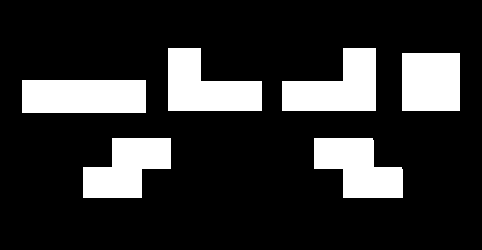

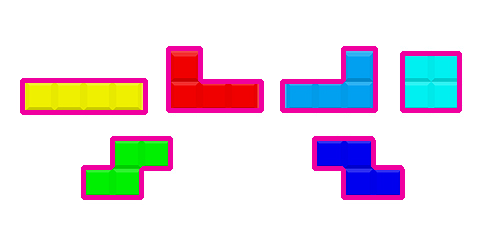

In [3]:
# import the necessary packages
from __future__ import print_function
import imutils
import cv2
from scipy.spatial import distance as dist
from collections import OrderedDict
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
from IPython.display import display
# load the Tetris block image, convert it to grayscale, and threshold the image
print("OpenCV Version: {}".format(cv2.__version__))
image = cv2.imread(r"/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/checking-opencv-version/checking-opencv-version/tetris_blocks.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_,thresh    = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
ret,thresh1 = cv2.threshold(gray,225,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(gray,225,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(gray,225,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(gray,225,255,cv2.THRESH_TOZERO_INV)
# check to see if we are using OpenCV 2.X or OpenCV 4
if imutils.is_cv2() or imutils.is_cv4():
	(cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
 
# check to see if we are using OpenCV 3
elif imutils.is_cv3():
	(_, cnts, _) = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

image_cont=image.copy()
# draw the contours on the image
cv2.drawContours(image_cont, cnts, -1, (240, 0, 159), 3)
display(Image.fromarray(thresh))
display(Image.fromarray(image_cont))

In [4]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


In [5]:
def detect(c):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    # if the shape is a triangle, it will have 3 vertices
    if len(approx) == 3:
        shape = "triangle"
 
    # if the shape has 4 vertices, it is either a square or a rectangle
    elif len(approx) == 4:
        # compute the bounding box of the contour and use the bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)
 
        # a square will have an aspect ratio that is approximately equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
 
    # if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
        shape = "pentagon"
 
    # otherwise, we assume the shape is a circle
    else:
        shape = "Random"
 
    # return the name of the shape
    return shape


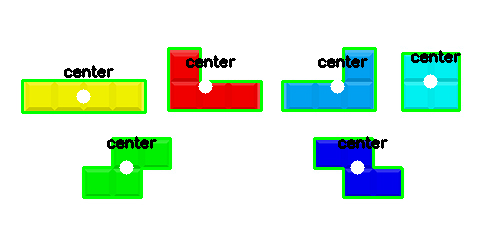

In [6]:
image_color=image.copy()
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    shape = detect(c)
    # draw the contour and center of the shape on the image
    cv2.drawContours(image_color, [c], -1, (0, 255, 0), 2)
    cv2.circle(image_color, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image_color, "center", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
 
    # show the image
display(Image.fromarray(image_color))

357 167 Random
126 167 Random
83 96 rectangle
430 81 square
337 86 Random
205 86 Random


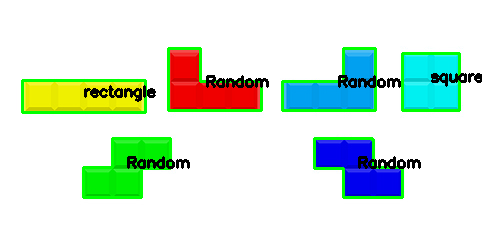

In [7]:
image_shape = image.copy()

# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the shape using only the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]))
    cY = int((M["m01"] / M["m00"]))
    shape = detect(c)
    print(cX,cY,shape)

    # draw the contour and center of the shape on the image
    cv2.drawContours(image_shape, [c], -1, (0, 255, 0), 2)
    cv2.circle(image_color, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(image_shape, shape, (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
display(Image.fromarray(image_shape))

In [ ]:
#resize option 

image_re = image.copy()
resized = imutils.resize(image_re, width=300)
ratio = image_re.shape[0] / float(resized.shape[0])
 
# convert the resized image to grayscale, blur it slightly, and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY)[1]
 
# find contours in the thresholded image and initialize the shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(cnts)
# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = detect(c)
 
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image_re, [c], -1, (0, 255, 0), 2)
	cv2.putText(image_re, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0, 0), 2)
 
	# show the output image
display(Image.fromarray(image_re))

In [ ]:
# import the necessary packages

def label( image, c):
    # construct a mask for the contour, then compute the average L*a*b* value for the masked region
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    mask = cv2.erode(mask, None, iterations=2)
    mean = cv2.mean(image, mask=mask)[:3]
 
    # initialize the minimum distance found thus far
    minDist = (np.inf, None)
 
    # loop over the known L*a*b* color values
    for (i, row) in enumerate(lab):
        # compute the distance between the current L*a*b* color value and the mean of the image
        d = dist.euclidean(row[0], mean)
 
        # if the distance is smaller than the current distance, then update the bookkeeping variable
        if d < minDist[0]:
            minDist = (d, i)
 
    # return the name of the color with the smallest distance
    return colorNames[minDist[1]]

In [ ]:
image_col = image.copy()
blurred = cv2.GaussianBlur(image_col, (5, 5), 0)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
lab = cv2.cvtColor(blurred, cv2.COLOR_BGR2LAB)
display(Image.fromarray(lab))
 
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int((M["m10"] / M["m00"]) )
    cY = int((M["m01"] / M["m00"]) )
 
    # detect the shape of the contour and label the color
    color = label(lab, c)
    print(color)
     
    # multiply the contour (x, y)-coordinates by the resize ratio,then draw the contours and the name of the shape and labeled color on the image
    text = color
    cv2.drawContours(image_col, [c], -1, (0, 255, 0), 2)
    cv2.putText(image_col, text, (cX, cY),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
     # show the output image


In [8]:
# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]

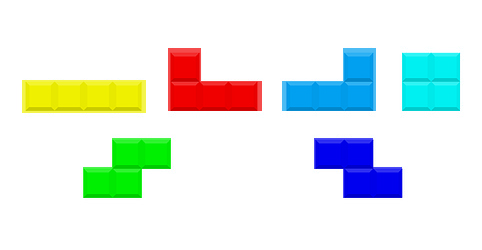

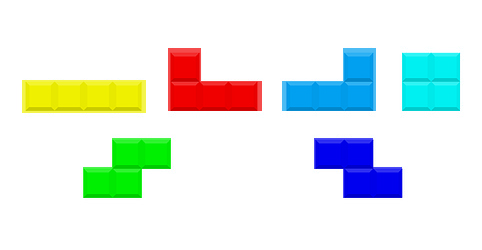

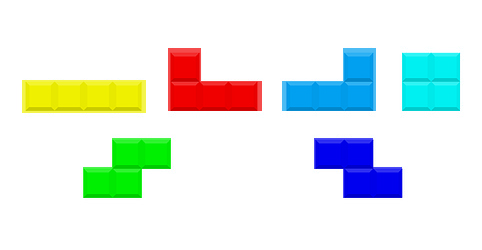

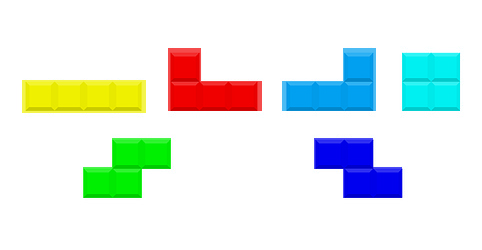

In [11]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the boundaries
for (lower, upper) in boundaries:
    # create NumPy arrays from the boundaries
    lower = np.array(lower, dtype = "uint8")
    upper = np.array(upper, dtype = "uint8")
     
    # find the colors within the specified boundaries and apply the mask
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
 
    # show the images
    display(Image.fromarray(image))